<a href="https://colab.research.google.com/github/matfabrix/ideal-octo-spork/blob/main/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-ocr

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read('il_680x540.3285801815_pq0q.jpg')

In [ ]:
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])

2/2 [==============================] - 13s 4s/step


<Axes: >

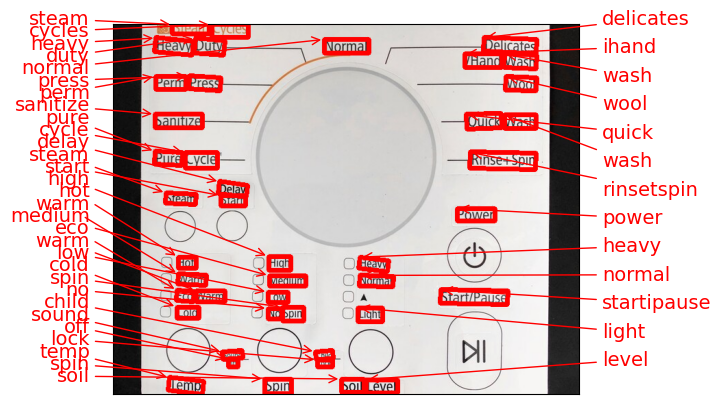

In [ ]:
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [ ]:
print(prediction_groups[0][20])

('power', array([[502., 269.],
       [557., 269.],
       [557., 287.],
       [502., 287.]], dtype=float32))


In [ ]:
import math
import numpy as np
import cv2

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
#example of a line mask for the word "Power"
box = prediction_groups[0][20]
x0, y0 = box[1][0]
x1, y1 = box[1][1]
x2, y2 = box[1][2]
x3, y3 = box[1][3]

In [ ]:
#midpoints and thickness
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [ ]:
#create mask
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

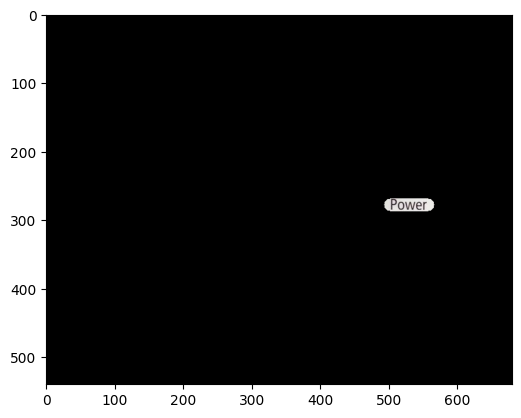

In [ ]:
#check masked area
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

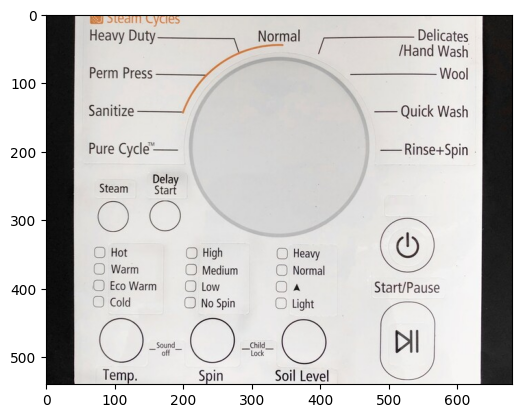

In [ ]:
#impainting the image
img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)